# Box Cox Transform

<img src='static/box cox transform.png'>

The exponent here is a variable called lambda (λ) that varies over the range of -5 to 5, and  in the process of searching, we examine all values of λ. Finally, we Choose the optimal value (resulting in the best approximation to a normal distribution) for your variable.

# Yeo - johnson Transform

<img src='static/yeo johnsom transform.png'>

This transformation is somewhat of an adjusment to the Box-Cox transformation, by which we can apply it to negative numbers.

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, accuracy_score

from sklearn.preprocessing import PowerTransformer

In [5]:
df = pd.read_csv('concrete_data.csv')

In [8]:
df.shape

(1030, 9)

In [9]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [11]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


box cox should not have zero

In [12]:
X = df.drop(columns=['Strength'])
y = df.iloc[:,-1]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=42)

In [26]:
# applying regression without any transformation
lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)

0.6196312800273647

In [27]:
# Cross checking with cross cal score

lr = LinearRegression()

np.mean(cross_val_score(lr,X,y,scoring='r2'))

0.4609940491662864

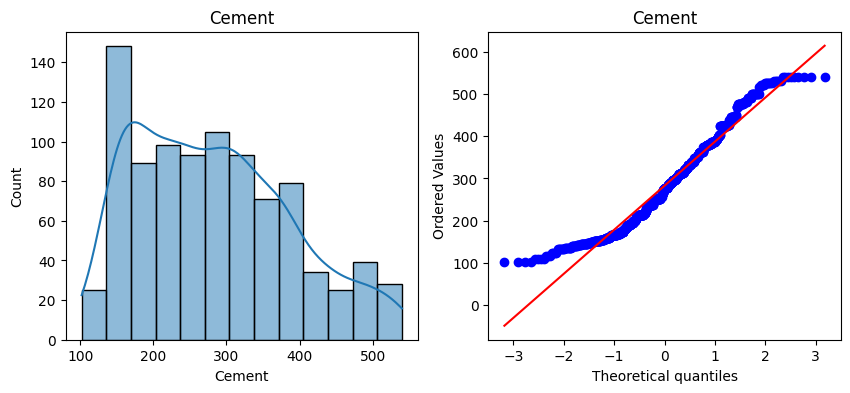

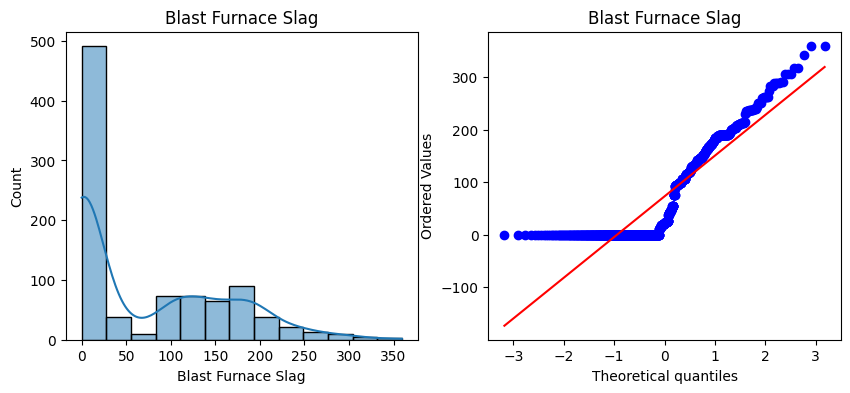

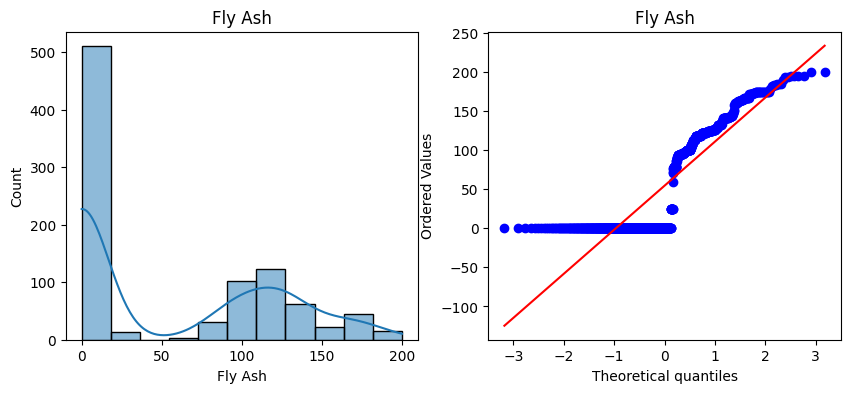

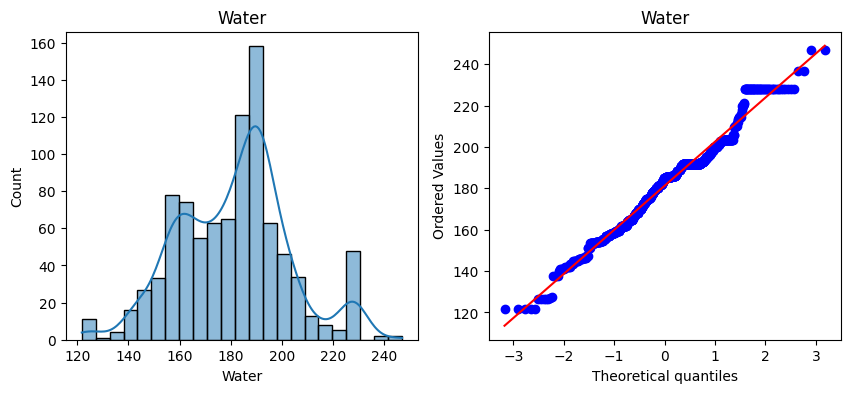

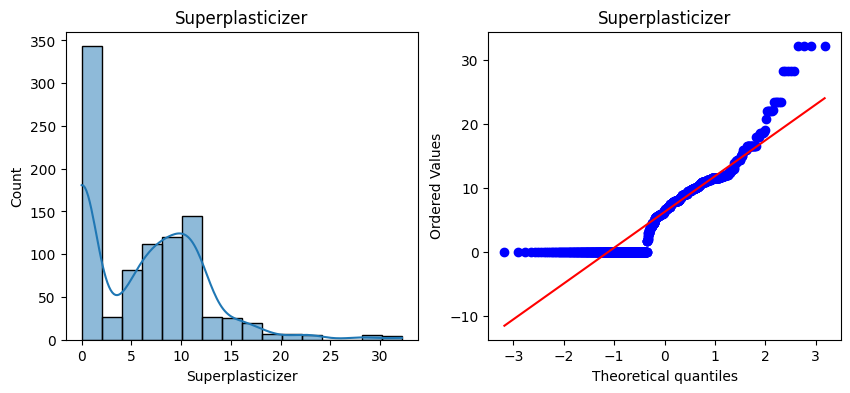

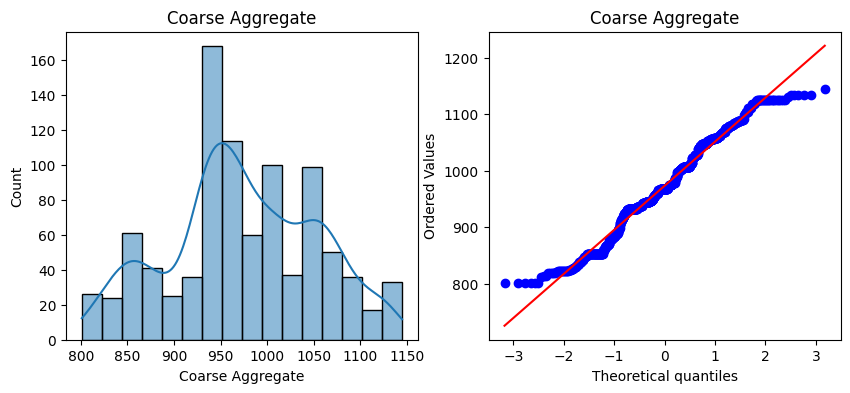

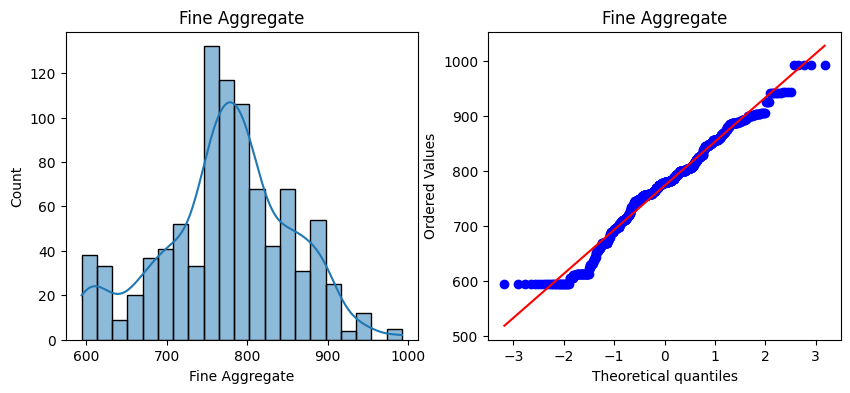

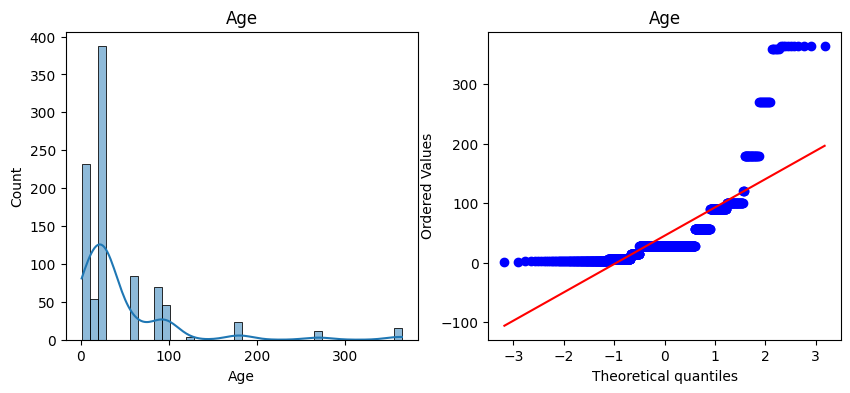

In [31]:
# Plotting the distplots without any transformation
for col in X_train.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()

In [45]:
# Applying Box-Cox Transform
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train + 0.0000001) # adding this value dont affect the result but it all zeros will not zeros
X_test_transformed = pt.transform(X_test + 0.0000001)

pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_})
# .lambdas_: An attribute of PowerTransformer that contains the Box-Cox transformation parameters (lambdas) for each feature.

,cols,box_cox_lambdas
0,Cement,0.176610
1,Blast Furnace Slag,0.022796
2,Fly Ash,-0.029171
3,Water,0.792307
4,Superplasticizer,0.091058
5,Coarse Aggregate,1.179074
6,Fine Aggregate,1.807029
7,Age,0.058223


In [38]:
# applying linear regression on transformed data

lr = LinearRegression()
lr.fit(X_train_transformed, y_train)

y_pred2 = lr.predict(X_test_transformed)

r2_score(y_test,y_pred2) # we can observe that our r2 score is improved

0.8169348376439914

In [40]:
# using cross val score

pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X + 0.000001)

lr = LinearRegression()

np.mean(cross_val_score(lr, X_transformed, y, scoring='r2'))

0.666295031974616

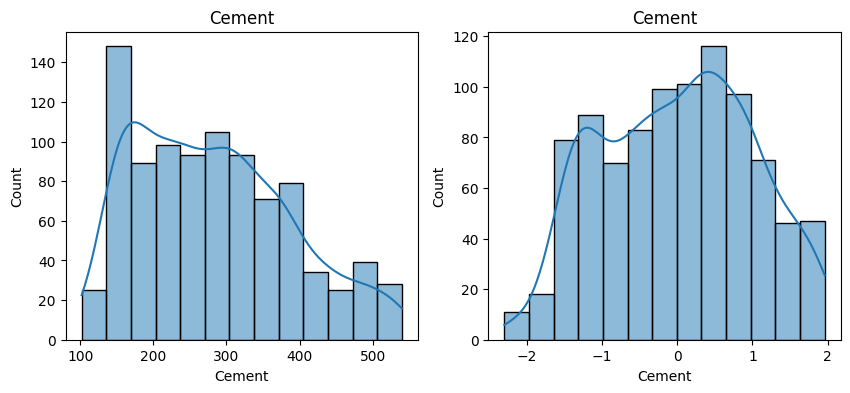

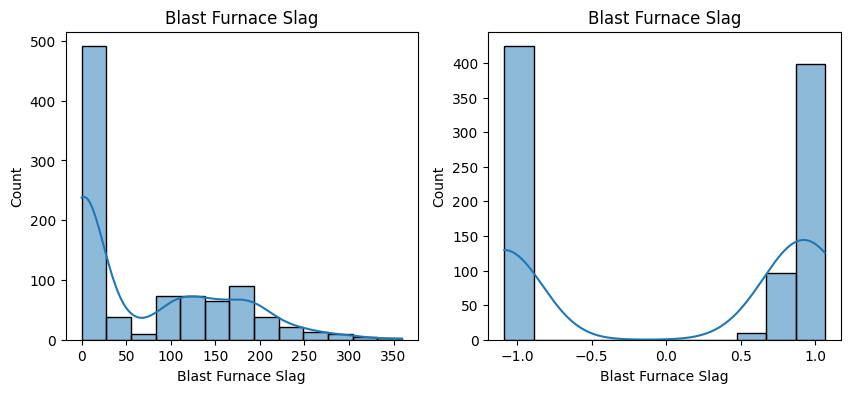

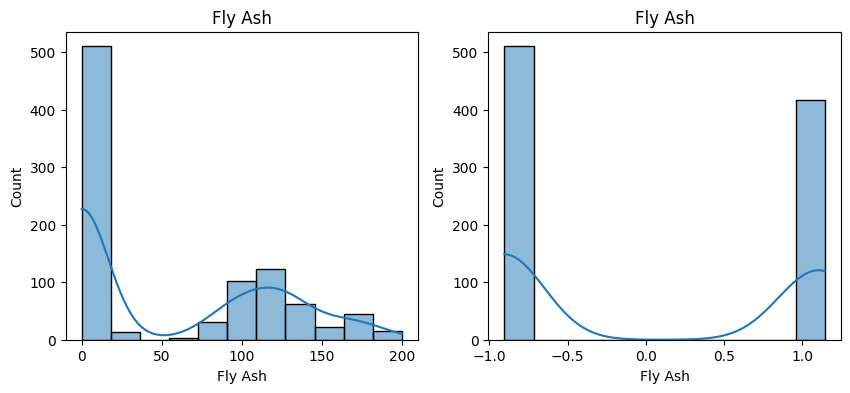

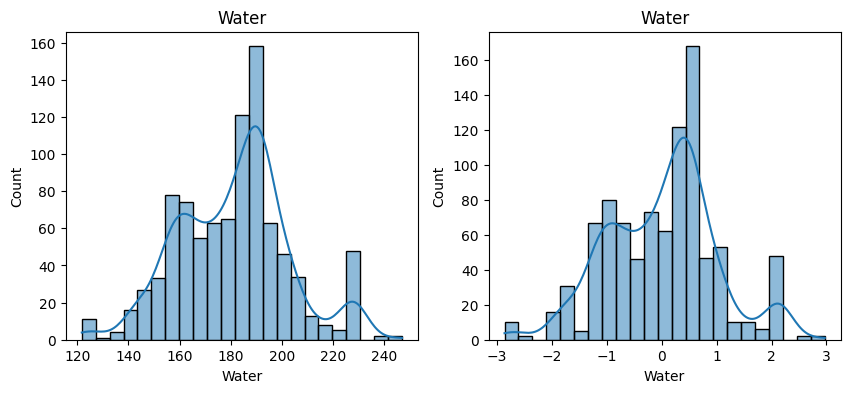

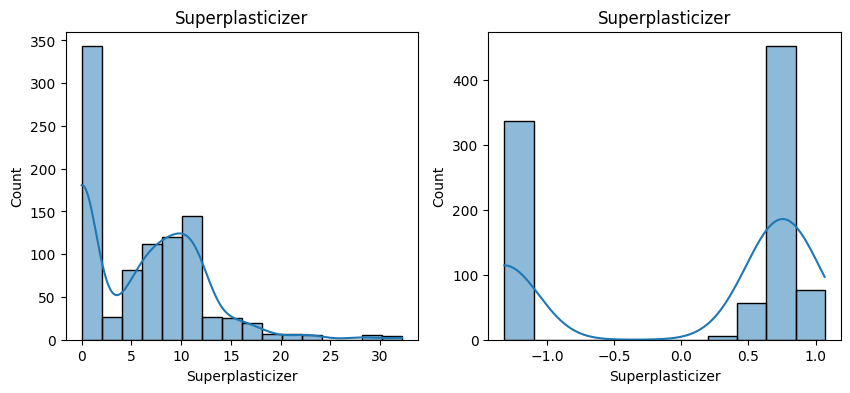

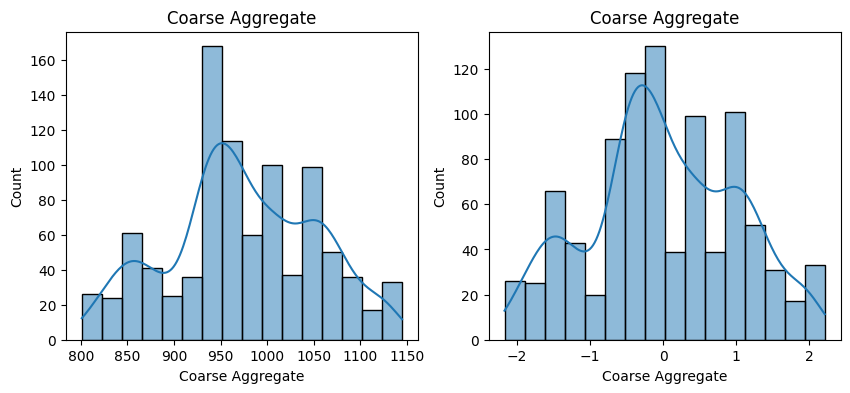

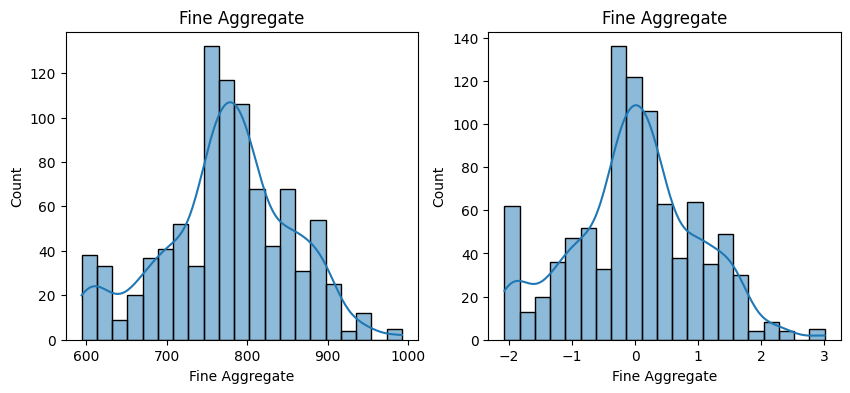

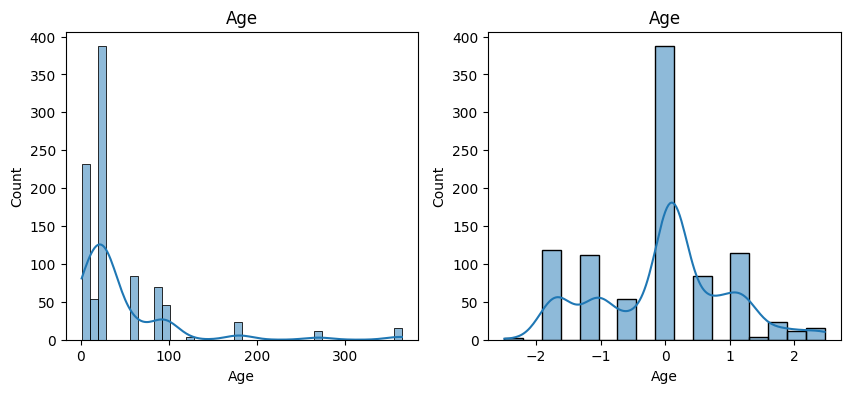

In [49]:
# Before and After Comparision for Box-Cox Plot

X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns)

for col in X_train_transformed.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed[col], kde=True)
    plt.title(col)
    

In [59]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2, y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test, y_pred3))

pd.DataFrame({'cols':X_train.columns, 'Yeo_Jhonson_lambdas': pt1.lambdas_})

0.8313170752238848


,cols,Yeo_Jhonson_lambdas
0,Cement,0.173931
1,Blast Furnace Slag,0.012297
2,Fly Ash,-0.138135
3,Water,0.791064
4,Superplasticizer,0.274860
5,Coarse Aggregate,1.179360
6,Fine Aggregate,1.808138
7,Age,0.011261


In [61]:
# Applying cross val score

pt = PowerTransformer()
X_transformed2 = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transformed2, y, scoring='r2'))

0.6834625134285748

In [62]:
X_train_transformed2 = pd.DataFrame(X_train_transformed2, columns=X_train.columns)

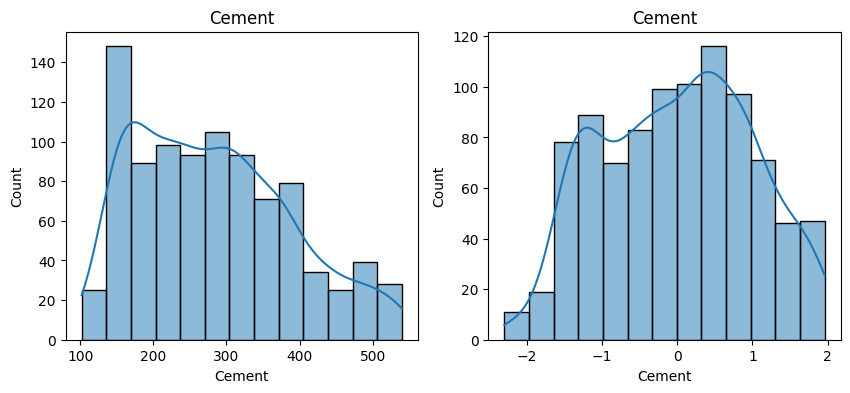

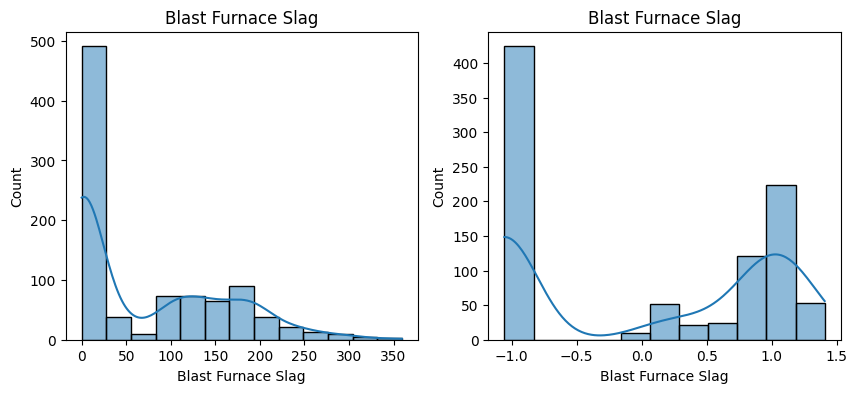

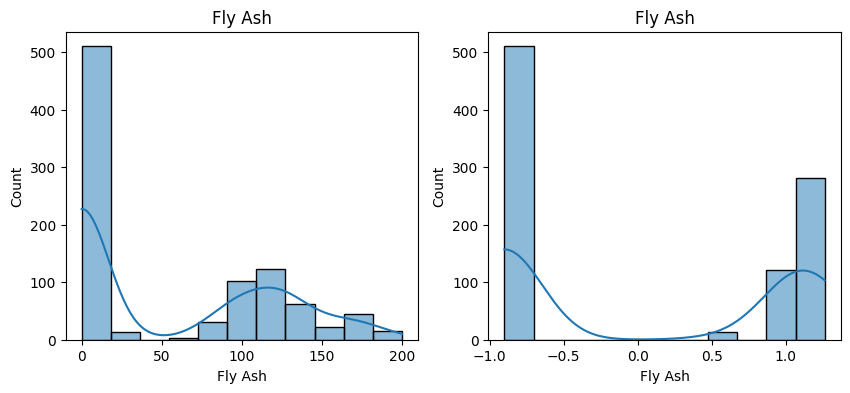

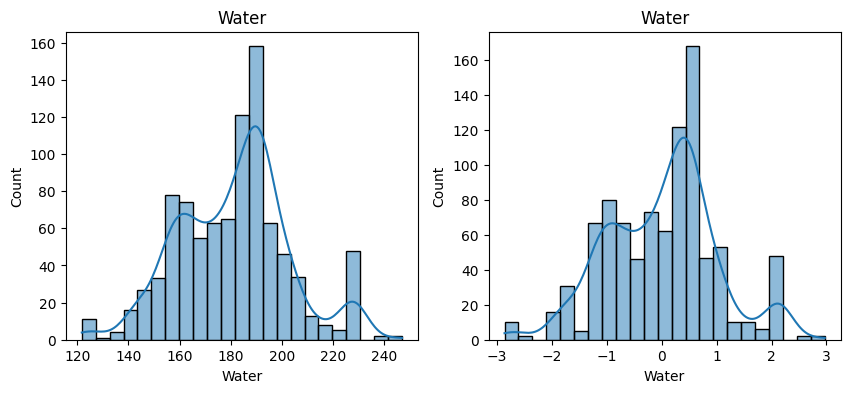

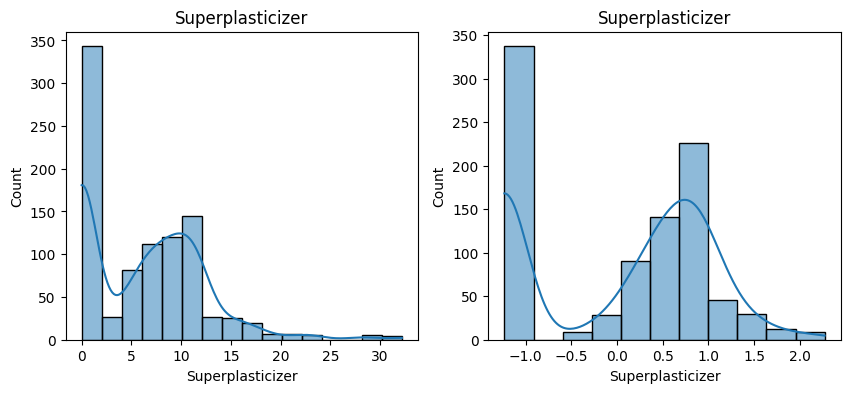

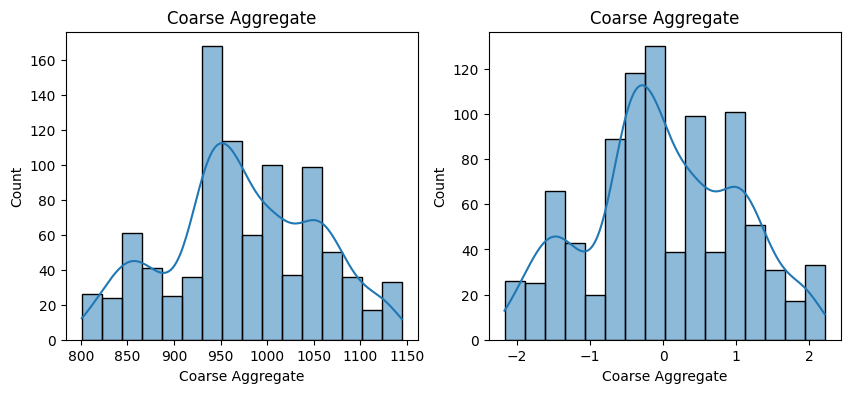

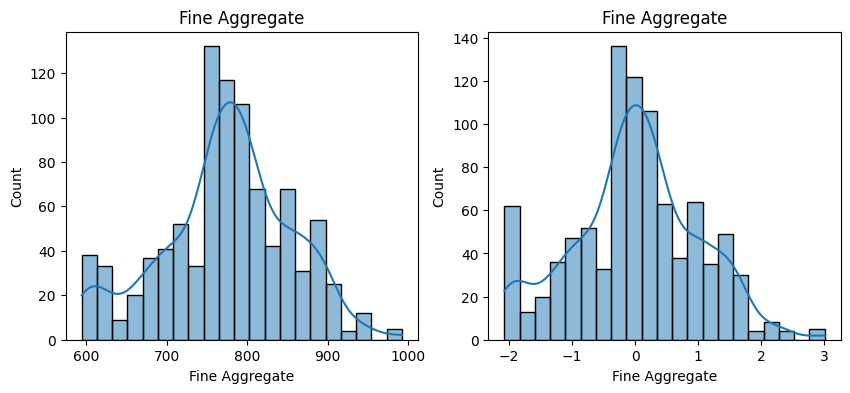

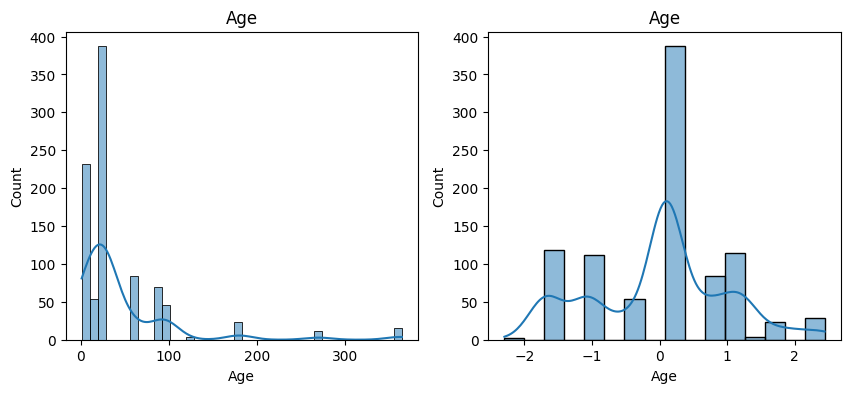

In [65]:
# Before and After comparision for Yeo-Johnson

for col in X_train_transformed2.columns:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    plt.subplot(1,2,2)
    sns.histplot(X_train_transformed2[col], kde=True)
    plt.title(col)

    plt.show()
